In [1]:
pip install Factor_Analyzer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 326 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 29.7 MB/s 
     |████████████████████████████████| 8.8 MB 59.1 MB/s 
     |████████████████████████████████| 98 kB 3.5 MB/s 
     |████████████████████████████████| 468 kB 49.7 MB/s 
  Created wheel for Factor-Analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=9fd9b15f5814e9a96ab4619281086df06fbc03a31ab6ab1c8eec37487d96bc67
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built Factor-Analyzer


In [2]:
import pandas as pd
from factor_analyzer import FactorAnalyzer as FA
import matplotlib.pyplot as plt
data=pd.read_csv("bfi.csv")
data.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [3]:
data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2800 non-null   int64  
 1   A1          2784 non-null   float64
 2   A2          2773 non-null   float64
 3   A3          2774 non-null   float64
 4   A4          2781 non-null   float64
 5   A5          2784 non-null   float64
 6   C1          2779 non-null   float64
 7   C2          2776 non-null   float64
 8   C3          2780 non-null   float64
 9   C4          2774 non-null   float64
 10  C5          2784 non-null   float64
 11  E1          2777 non-null   float64
 12  E2          2784 non-null   float64
 13  E3          2775 non-null   float64
 14  E4          2791 non-null   float64
 15  E5          2779 non-null   float64
 16  N1          2778 non-null   float64
 17  N2          2779 non-null   float64
 18  N3          2789 non-null   float64
 19  N4          2764 non-null  

In [7]:
data.drop(['gender','education','age'],axis=1,inplace=True)
data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity as CBS
chi_square_value,p_value=CBS(data)
chi_square_value,p_value

/usr/local/lib/python3.8/dist-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(nan, nan)

In [13]:
from factor_analyzer.factor_analyzer import calculate_kmo as Ckmo
data.dropna(inplace=True)
kmo_all , kmo_model = Ckmo(data)
print(kmo_all,kmo_model)

[0.61117947 0.75423878 0.83684634 0.87024471 0.87804271 0.90287407
 0.84310042 0.7959044  0.85096212 0.8265822  0.86415543 0.83871541
 0.88380142 0.89688431 0.87747671 0.89355679 0.77957992 0.77992832
 0.86232485 0.88530496 0.86026287 0.85833622 0.78028961 0.84440323
 0.76978907 0.76164188] 0.8483267027192372


In [14]:
data.corr()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
Unnamed: 0,1.000000,0.045092,-0.050774,-0.015351,0.011072,0.003894,0.043056,0.042020,-0.011260,-0.004108,-0.010456,0.046068,0.050658,-0.028533,-0.030709,-0.032384,-0.018029,-0.043952,-0.002235,0.009216,-0.003419,0.017878,-0.025767,-0.007838,-0.007157,-0.001474
A1,0.045092,1.000000,-0.350905,-0.273636,-0.156754,-0.192698,0.014698,0.012918,-0.020587,0.115074,0.038293,0.107178,0.087922,-0.048913,-0.069781,-0.020182,0.168279,0.139814,0.092366,0.042140,0.015181,0.005782,0.066176,-0.063788,-0.090512,0.099166
A2,-0.050774,-0.350905,1.000000,0.503041,0.350856,0.397400,0.102983,0.129574,0.188818,-0.146295,-0.121106,-0.222280,-0.243084,0.255066,0.297125,0.294191,-0.093627,-0.050476,-0.040407,-0.086735,0.019688,0.125633,0.013958,0.165319,0.082609,-0.080838
A3,-0.015351,-0.273636,0.503041,1.000000,0.384918,0.515679,0.114211,0.146511,0.129391,-0.121116,-0.153811,-0.210366,-0.291863,0.383131,0.387630,0.253463,-0.083266,-0.092473,-0.039158,-0.127107,-0.040143,0.150086,0.006588,0.226333,0.032267,-0.041750
A4,0.011072,-0.156754,0.350856,0.384918,1.000000,0.325644,0.094813,0.226454,0.133065,-0.172271,-0.249675,-0.133600,-0.209979,0.204377,0.318935,0.168873,-0.106645,-0.155289,-0.073887,-0.171228,-0.015136,0.057075,0.037763,0.070983,-0.049793,0.027308
A5,0.003894,-0.192698,0.397400,0.515679,0.325644,1.000000,0.134692,0.116863,0.130820,-0.125531,-0.167036,-0.252310,-0.338485,0.411831,0.482558,0.268616,-0.204765,-0.198836,-0.138472,-0.215346,-0.081404,0.162596,-0.006988,0.238191,0.011354,-0.050449
C1,0.043056,0.014698,0.102983,0.114211,0.094813,0.134692,1.000000,0.438223,0.317270,-0.362491,-0.261079,-0.030506,-0.106797,0.134767,0.153208,0.267829,-0.071954,-0.038180,-0.025476,-0.098035,-0.047970,0.179249,-0.129263,0.196562,0.100189,-0.130471
C2,0.042020,0.012918,0.129574,0.146511,0.226454,0.116863,0.438223,1.000000,0.362826,-0.396090,-0.303820,0.017052,-0.075232,0.152957,0.122901,0.257836,-0.019951,-0.005586,0.003189,-0.044341,0.051212,0.161042,-0.057347,0.192681,0.047427,-0.066590
C3,-0.011260,-0.020587,0.188818,0.129391,0.133065,0.130820,0.317270,0.362826,1.000000,-0.357824,-0.350949,-0.009045,-0.089244,0.092564,0.099537,0.207488,-0.079093,-0.066880,-0.077416,-0.122175,-0.023508,0.091141,-0.029604,0.058880,0.011360,-0.002809
C4,-0.004108,0.115074,-0.146295,-0.121116,-0.172271,-0.125531,-0.362491,-0.396090,-0.357824,1.000000,0.487551,0.098480,0.207823,-0.084545,-0.112542,-0.235012,0.215852,0.158346,0.201905,0.270633,0.197062,-0.093561,0.208072,-0.083027,0.053014,0.189543


In [15]:
data.count()

Unnamed: 0    2436
A1            2436
A2            2436
A3            2436
A4            2436
A5            2436
C1            2436
C2            2436
C3            2436
C4            2436
C5            2436
E1            2436
E2            2436
E3            2436
E4            2436
E5            2436
N1            2436
N2            2436
N3            2436
N4            2436
N5            2436
O1            2436
O2            2436
O3            2436
O4            2436
O5            2436
dtype: int64

In [16]:
fa = FA(n_factors = 3, rotation = 'varimax')
fa.fit(data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [17]:
fa.get_factor_variance()

(array([3.27939442, 2.67445615, 2.24249104]),
 array([0.12613055, 0.1028637 , 0.08624966]),
 array([0.12613055, 0.22899425, 0.31524391]))

In [18]:
ev , v=fa.get_eigenvalues()

In [20]:
fa = FA()
fa.fit(data)
fa.loadings_

array([[-0.07131035, -0.01751926,  0.05405798],
       [-0.23219058,  0.08334477,  0.03458871],
       [ 0.5413533 ,  0.06211685,  0.04667964],
       [ 0.64586903,  0.04331579,  0.00192803],
       [ 0.3910012 , -0.0592843 ,  0.07552545],
       [ 0.64743433, -0.08504573, -0.01610074],
       [-0.012761  ,  0.08019221,  0.61189813],
       [-0.00668553,  0.14317342,  0.63664785],
       [-0.00354386, -0.00201999,  0.48602329],
       [ 0.05511348,  0.18756638, -0.63069868],
       [-0.05185813,  0.26189667, -0.46496583],
       [-0.53560024,  0.02486523,  0.09320605],
       [-0.57445534,  0.2160911 , -0.01194907],
       [ 0.6069387 ,  0.09092885,  0.0968013 ],
       [ 0.69550544, -0.10590157, -0.06884823],
       [ 0.4264341 ,  0.09512995,  0.30777364],
       [ 0.00397076,  0.74125646, -0.06354794],
       [-0.02255664,  0.74077167, -0.01052292],
       [ 0.01980718,  0.74281971, -0.04895261],
       [-0.1871232 ,  0.58791351, -0.08352484],
       [-0.0122797 ,  0.50640962, -0.094

In [21]:
ev, v=fa.get_eigenvalues()
ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

In [22]:
data.describe()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
count,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,64593.297209,2.406404,4.797209,4.598522,4.687603,4.543514,4.525041,4.372332,4.300082,2.549672,3.305829,2.978654,3.154351,3.984401,4.408867,4.390805,2.943760,3.517652,3.224548,3.202381,2.971264,4.812808,2.684729,4.449918,4.925287,2.468801
std,1732.091241,1.407177,1.179535,1.311355,1.485213,1.270804,1.235258,1.319152,1.291202,1.376689,1.632720,1.631428,1.613847,1.351766,1.467060,1.343316,1.575909,1.533238,1.594674,1.569633,1.623491,1.126613,1.552883,1.205206,1.193136,1.324021
min,61617.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,63076.500000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000
50%,64582.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000
75%,66092.250000,3.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,6.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000
max,67560.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [23]:
data.shape[1]+1

27

In [24]:
ev1,v1 = fa.get_eigenvalues()

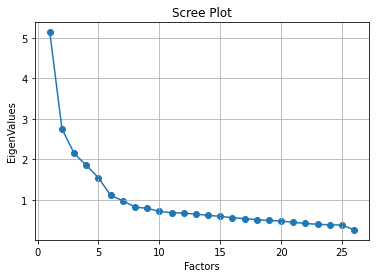

In [25]:
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('EigenValues')
plt.grid()
plt.show()